<a href="https://colab.research.google.com/github/sarthakkaushik/Diploma-Program-in-ML-and-AI/blob/main/Cat_vs_Tog_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

#Importing packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt




In [22]:
#Loading the data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#Unzipping the contents
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

#Assigning variable names for the training and validation set
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
#Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#Directory with our validation dog pictures 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#Understanding the data
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


#Prepping our data-Our images have to be formatted into appropriately pre-processed floating-point tensors before we can feed it to the network.

In [24]:
#Variables for convenience
batch_size=128
epochs=15
IMG_HEIGHT= 150
IMG_WIDTH= 150

#Genrator of our trainig data
train_image_genrator=ImageDataGenerator(rescale=1./255)
#Genrato of our validation data
validation_image_generator=ImageDataGenerator(rescale=1./255)

train_data_gen= train_image_genrator.flow_from_directory(batch_size=batch_size,directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT,IMG_WIDTH), class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,directory=validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Visualizing the training images
We will now extract a batch of images from the training generator and then plot five of them with matplotlib.


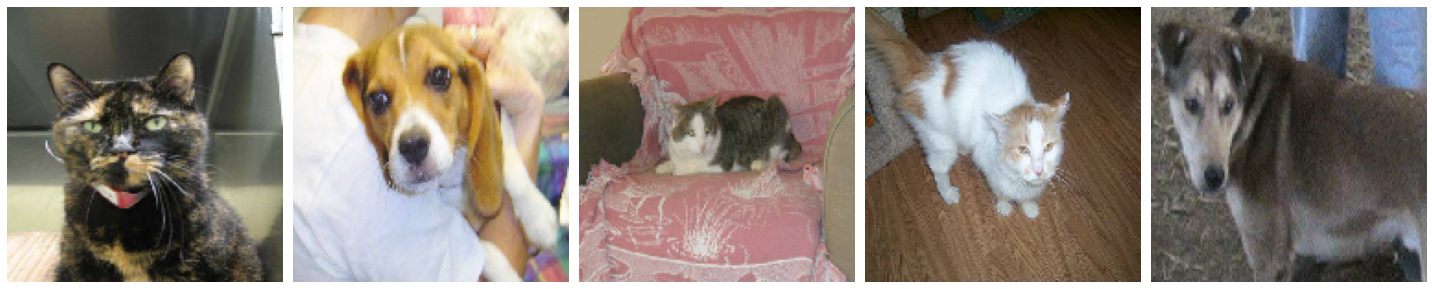

In [25]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

#Creating the model

In [64]:
# model=Sequential()
# model.add(Conv2D(16,3, padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(64,3,padding='same',activation='relu'))
# model.add(MaxPooling2D())
# model.add(BatchNormalization())

# model.add(Conv2D(32,3,padding='same',activation='relu'))
# model.add(MaxPooling2D())
# model.add(BatchNormalization())

# #Falttening our dimension

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))

# #Output Layer
# model.add(Dense(1))



model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu')) 
model.add(MaxPooling2D()),

# Flattening our dimensions
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(1))

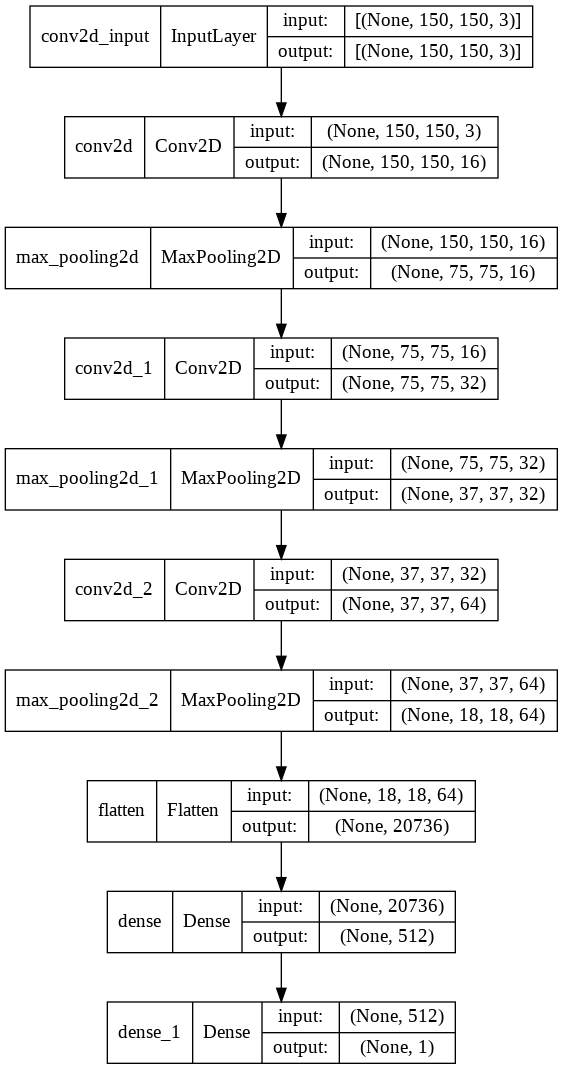

In [65]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [66]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [67]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [68]:
history = model.fit(train_data_gen,steps_per_epoch=total_train//batch_size, epochs=epochs,validation_data=val_data_gen, validation_steps=total_val//batch_size,verbose=2)

#https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

Epoch 1/15
15/15 - 11s - loss: 1.2069 - accuracy: 0.5294 - val_loss: 0.6910 - val_accuracy: 0.4989 - 11s/epoch - 712ms/step
Epoch 2/15
15/15 - 9s - loss: 0.6919 - accuracy: 0.4989 - val_loss: 0.6909 - val_accuracy: 0.4967 - 9s/epoch - 610ms/step
Epoch 3/15
15/15 - 9s - loss: 0.6841 - accuracy: 0.5251 - val_loss: 0.6905 - val_accuracy: 0.5056 - 9s/epoch - 608ms/step
Epoch 4/15
15/15 - 9s - loss: 0.6567 - accuracy: 0.5771 - val_loss: 0.6484 - val_accuracy: 0.5547 - 9s/epoch - 602ms/step
Epoch 5/15
15/15 - 9s - loss: 0.6220 - accuracy: 0.6154 - val_loss: 0.6185 - val_accuracy: 0.6071 - 9s/epoch - 594ms/step
Epoch 6/15
15/15 - 9s - loss: 0.5747 - accuracy: 0.6613 - val_loss: 0.6136 - val_accuracy: 0.6786 - 9s/epoch - 606ms/step
Epoch 7/15
15/15 - 9s - loss: 0.5213 - accuracy: 0.7270 - val_loss: 0.6006 - val_accuracy: 0.6808 - 9s/epoch - 621ms/step
Epoch 8/15
15/15 - 9s - loss: 0.4812 - accuracy: 0.7580 - val_loss: 0.5942 - val_accuracy: 0.6797 - 9s/epoch - 605ms/step
Epoch 9/15
15/15 - 9s 

#Visualizing the training results with a Plot

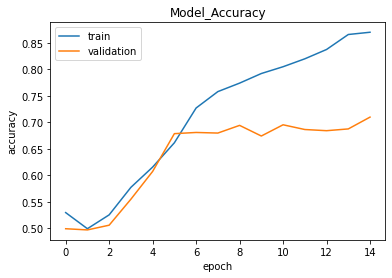

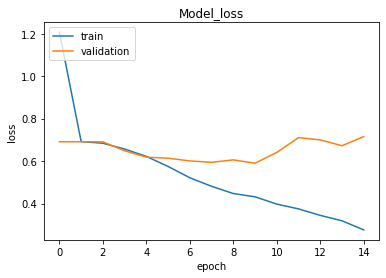

In [69]:
#Summary history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#Summary history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')
plt.show()

As you can see from the graphs, the training accuracy and validation accuracy are off by a large margin and the model has achieved only around 70% accuracy on the validation set.

#Overfitting

Augmenting and visualizing the data

Found 2000 images belonging to 2 classes.


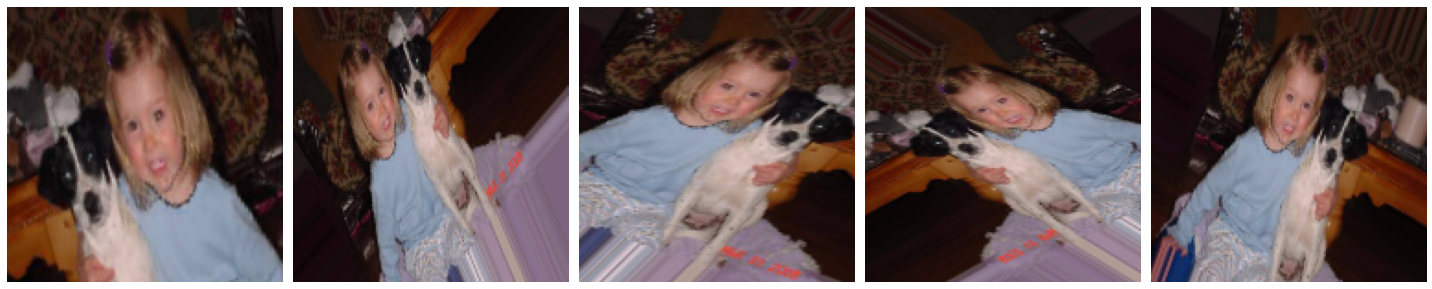

In [70]:
image_gen_train = ImageDataGenerator(rescale=1./255,rotation_range=45,width_shift_range=.15,height_shift_range=.15,horizontal_flip=True,zoom_range=0.5)
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Creating a validation data generator

In [71]:

image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,directory=validation_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='binary')

Found 1000 images belonging to 2 classes.


#Creating a new network with Dropouts

In [75]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.
model_new = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)), 
                        MaxPooling2D(),
                        Dropout(0.2),
                        Conv2D(32, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Conv2D(64, 3, padding='same', activation='relu'),
                        MaxPooling2D(),
                        Dropout(0.2),
                        Flatten(),
                        Dense(512, activation='relu'),
                        # Output layer
                        Dense(1)])

#Compiling the model
model_new.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
model_new.summary()

#Training the new model
history = model_new.fit_generator(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,validation_data=val_data_gen,validation_steps=total_val//batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
15/15 [==============================] - 20s 1s/step - loss: 1.0442 - accuracy: 0.5235 - val_loss: 0.6903 - val_accuracy: 0.4978
Epoch 2/15
15/15 [==============================] - 19s 1s/step - loss: 0.6929 - accuracy: 0.5032 - val_loss: 0.6920 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 18s 1s/step - loss: 0.6918 - accuracy: 0.4963 - val_loss: 0.6893 - val_accuracy: 0.4933
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.6896 - accuracy: 0.5000 - val_loss: 0.6825 - val_accuracy: 0.5067
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.6826 - accuracy: 0.5091 - val_loss: 0.6737 - val_accuracy: 0.5000
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6606 - accuracy: 0.5582 - val_loss: 0.6666 - val_accuracy: 0.5614
Epoch 7/15
15/15 [==============================] - 19s 1s/step - loss: 0.6487 - accuracy: 0.5871 - val_loss: 0.6343 - val_accuracy: 0.5837
Epoch 8/15
15/15 [==

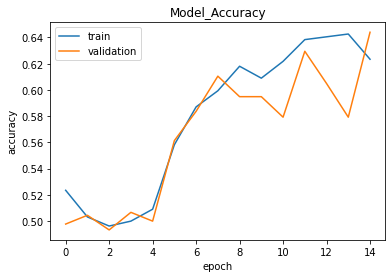

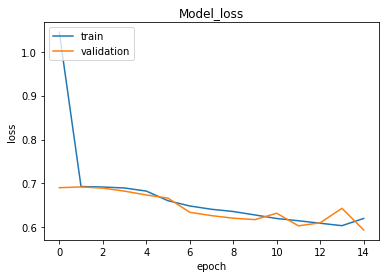

In [76]:
#Summary history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#Summary history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')
plt.show()